In [1]:
%matplotlib widget
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [2]:
# file_path = '../data/CL_experiments/train/inertia13_ki-0.0061-kp-11.8427/2024-10-16--10-57-42_exp  63.csv'
# file_path = '../data/simulated/10_percent/Experiment_2025-01-13_09-03-05.csv'
folder_path = '../data/simulated/50_percent_longer_steps'
exp_number = 501

exp_list = glob.glob(os.path.join(folder_path, '*.csv'))
# print(exp_list)

file_path = exp_list[exp_number]
print(file_path)
df = pd.read_csv(file_path)
# Find the first index where r changes from 0 to 1
# first_non_zero_index = df.index[df['r'].diff().gt(0)].min()
# last_index = df.index[df.t > 20].min()
# df = df.loc[first_non_zero_index:last_index]  # Keep rows up to that index

../data/simulated/50_percent_longer_steps\Experiment_2025-02-02_14-49-26.csv


In [3]:
df

,t,theta,omega,r,i_d,i_q,i_q_ref,v_d,v_q
0,0.00,0.000000,0.000000,2584.710838,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.01,0.056386,390.918336,2584.710838,0.018052,4.693541,4.800000,-0.820038,5.323721
2,0.02,0.235172,805.898392,2584.710838,0.096334,4.619606,4.800000,-4.678459,9.021826
3,0.03,0.535020,1209.819050,2584.710838,0.105003,4.506501,4.800000,-5.048069,14.678905
4,0.04,0.954516,1607.794678,2584.710838,0.141215,4.455362,4.800000,-6.740944,17.238190
...,...,...,...,...,...,...,...,...,...
996,9.96,1.486768,2763.269847,2766.823150,-0.030943,-0.108689,0.318697,1.497427,23.002608
997,9.97,2.309360,2763.748152,2766.823150,0.003839,-0.165116,0.315636,-0.191073,25.673991
998,9.98,3.131988,2763.451878,2766.823150,0.006326,-0.114623,0.316275,-0.368121,23.184519
999,9.99,3.954549,2763.521548,2766.823150,0.046331,-0.147044,0.319290,-2.314514,24.959516


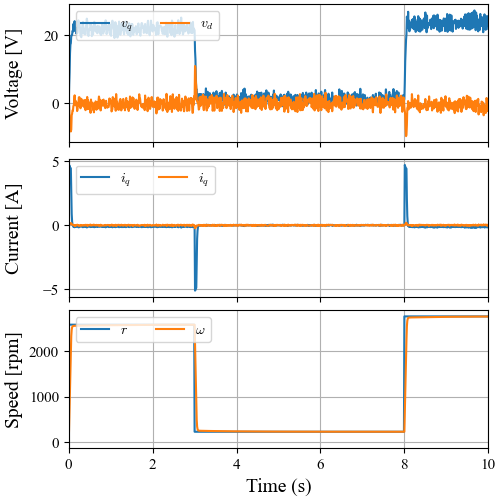

In [4]:
# Create the figure and subplots with shared x-axis
fig, axes = plt.subplots(3, 1, figsize=(5, 5), sharex=True, constrained_layout=True)

axes[0].plot(df.t, df.v_q, label='$v_q$')
axes[0].plot(df.t, df.v_d, label='$v_d$')
axes[0].set_ylabel('Voltage [V]')
axes[0].legend(ncols=2)


axes[1].plot(df.t, df.i_q, label='$i_q$')
axes[1].plot(df.t, df.i_d, label='$i_q$')
axes[1].set_ylabel('Current [A]')
axes[1].legend(ncols=2)

axes[2].plot(df.t, df.r, label='$r$')
axes[2].plot(df.t, df.omega, label=r'$\omega$')
axes[2].set_ylabel('Speed [rpm]')
axes[2].legend(ncols=2)

# Set the x-label for the last subplot
axes[-1].set_xlabel('Time (s)')
# Align the y-axis labels to the left
for ax in axes:
    ax.yaxis.set_label_coords(-0.11, 0.5)  # Adjust -0.1 based on figure width
    ax.legend(loc='upper left', ncol=2)

# Tight layout for better spacing
# plt.xlim([9, 12])
# plt.savefig('experiment.pdf')
plt.show()

In [5]:
import torch